In [32]:
print(__doc__)

import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV,LassoLarsCV,LassoLarsIC
from sklearn import datasets

Automatically created module for IPython interactive environment


In [33]:
EPSILON = 1e-4

In [34]:
diabetes = datasets.load_diabetes()

In [35]:
data = diabetes.data
values = diabetes.target

In [36]:
rng = np.random.RandomState(42)
data = np.c_[data,rng.randn(data.shape[0],14)]

In [37]:
data /= np.sqrt(np.sum(data**2,axis=0))

In [38]:
model_bic = LassoLarsIC(criterion="bic")
t1 = time.time()
model_bic.fit(data,values)
t_bic = time.time() - t1

alpha_bic_ = model_bic.alpha_

In [39]:
model_aic = LassoLarsIC(criterion="aic")
model_aic.fit(data,values)
alpha_aic = model_aic.alpha_

In [42]:
def plot_ic_criterion(model,name,color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    
    plt.plot(-np.log10(alphas_),criterion_,"--",color=color,
            linewidth=3,label="%s criterion" % name)
    plt.axvline(-np.log10(alpha_),color=color,linewidth=3,
               label="alpha:%s estimate"% name)
    plt.xlabel("-log(alpha)")
    plt.ylabel("criterion")

Text(0.5, 1.0, 'information-criterion for model selection (training time 0.014s)')

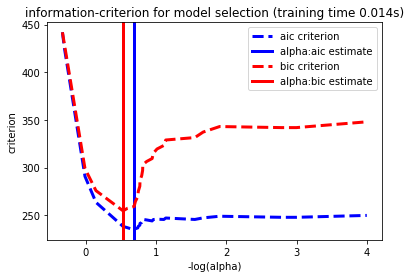

In [43]:
plt.figure()
plot_ic_criterion(model_aic,"aic","b")
plot_ic_criterion(model_bic,"bic","r")
plt.legend()
plt.title("information-criterion for model selection (training time %.3fs)" % t_bic)

# split line

In [44]:
print("computing regularization path using the coordinate descent lasso...")

computing regularization path using the coordinate descent lasso...


In [46]:
t1 = time.time()
model = LassoCV(cv=20).fit(data,values)
t_lasso_cv = time.time() - t1

In [48]:
# display results
m_log_alphas = -np.log10(model.alphas_ + EPSILON)

In [49]:
plt.figure()
ymin,ymax = 2300,3800

<Figure size 432x288 with 0 Axes>

In [51]:
m_log_alphas

array([-3.32063305e-01, -3.01761736e-01, -2.71460272e-01, -2.41158922e-01,
       -2.10857692e-01, -1.80556594e-01, -1.50255634e-01, -1.19954824e-01,
       -8.96541752e-02, -5.93536980e-02, -2.90534053e-02,  1.24668957e-03,
        3.15465723e-02,  6.18462277e-02,  9.21456391e-02,  1.22444789e-01,
        1.52743659e-01,  1.83042228e-01,  2.13340474e-01,  2.43638375e-01,
        2.73935905e-01,  3.04233038e-01,  3.34529745e-01,  3.64825995e-01,
        3.95121755e-01,  4.25416990e-01,  4.55711662e-01,  4.86005729e-01,
        5.16299150e-01,  5.46591876e-01,  5.76883857e-01,  6.07175041e-01,
        6.37465368e-01,  6.67754778e-01,  6.98043205e-01,  7.28330576e-01,
        7.58616816e-01,  7.88901844e-01,  8.19185572e-01,  8.49467905e-01,
        8.79748744e-01,  9.10027981e-01,  9.40305500e-01,  9.70581176e-01,
        1.00085488e+00,  1.03112646e+00,  1.06139578e+00,  1.09166266e+00,
        1.12192693e+00,  1.15218840e+00,  1.18244688e+00,  1.21270214e+00,
        1.24295395e+00,  